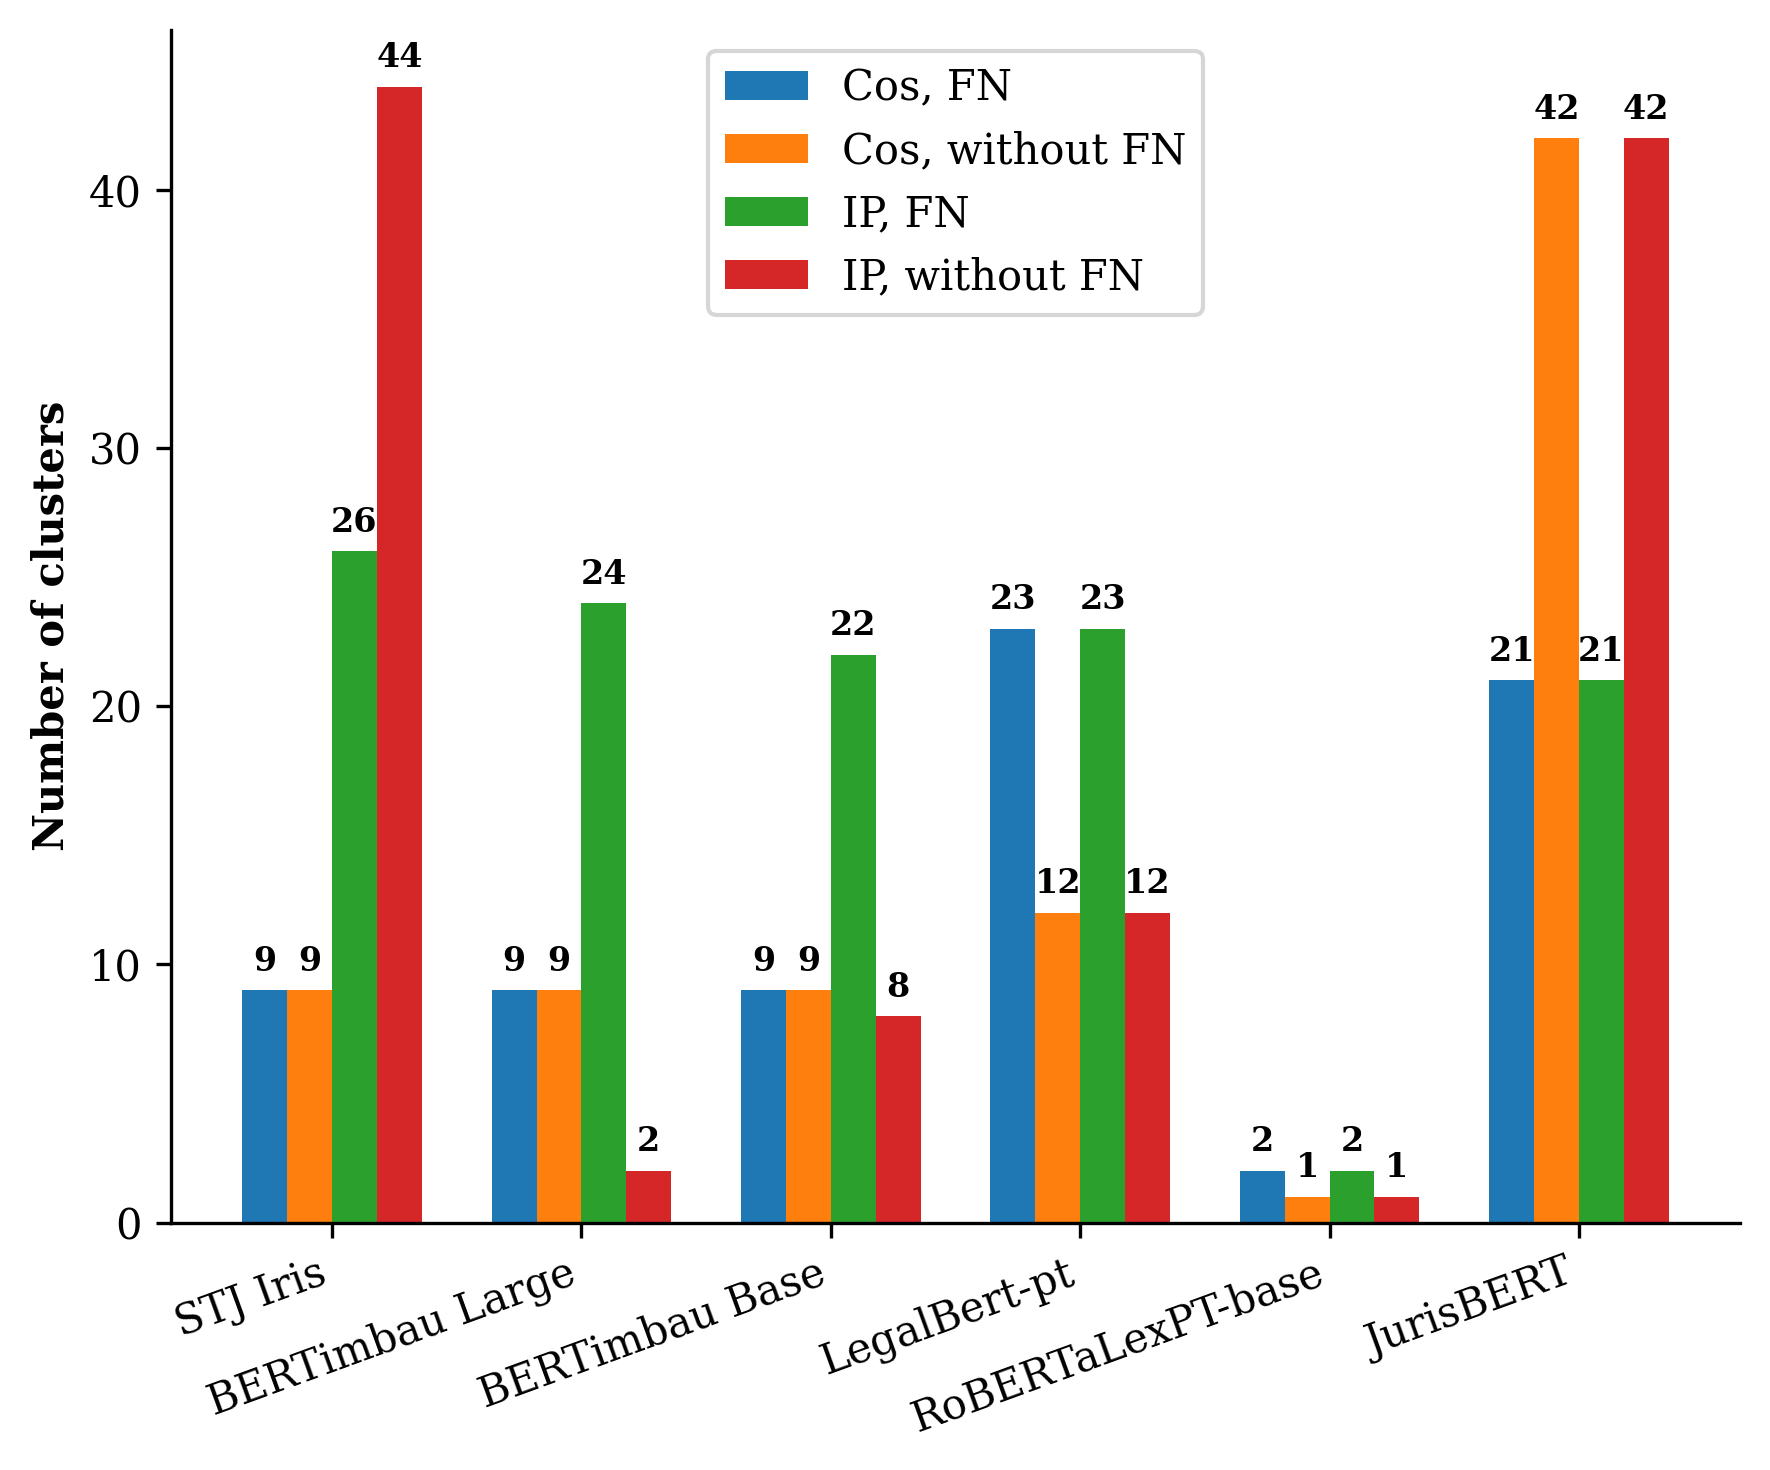

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Global plotting style configuration:
# - Set serif font and default size
# - Force all plot text elements to black
# - Remove top/right spines for a cleaner academic look
# - Set high DPI for publication-quality output
# ------------------------------------------------------------
plt.rcParams.update({
    "font.size": 10,
    "font.family": "serif",
    "text.color": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "axes.spines.top": False,
    "axes.spines.right": False,
    "figure.dpi": 300,
})

# ============================================================
# 1. DATA FROM TABLES 3 AND 4
# ============================================================

# Defined the list of evaluated embedding models.
models = [
    "STJ Iris",
    "BERTimbau Large",
    "BERTimbau Base",
    "LegalBert-pt",
    "RoBERTaLexPT-base",
    "JurisBERT"
]

# Stored the number of clusters for each experimental setting.
# - Cos: cosine similarity
# - IP: inner product similarity
# - FN: fine-tuned (with FN)
# - without FN: not fine-tuned
clusters_cos_ft   = [9, 9, 9, 23, 2, 21]
clusters_cos_noft = [9, 9, 9, 12, 1, 42]
clusters_pi_ft    = [26, 24, 22, 23, 2, 21]
clusters_pi_noft  = [44, 2, 8, 12, 1, 42]

# ============================================================
# 2. HELPER FUNCTION TO ANNOTATE BAR VALUES
# ============================================================

def annotate_bars(ax, bars, fmt="{:.0f}", rotation=0):
    # Implemented a reusable annotation routine that places the bar height above each bar.
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            fmt.format(height),  # Formatted numeric label text.
            xy=(bar.get_x() + bar.get_width() / 2, height),  # Anchored at bar top center.
            xytext=(0, 3),  # Shifted slightly upward for readability.
            textcoords="offset points",
            ha="center",
            va="bottom",
            rotation=rotation,
            fontsize=8,
            fontweight="bold",   # Emphasized values using bold font.
            color="black",
        )

# ============================================================
# 3. SINGLE PLOT: (b) CLUSTER COUNT COMPARISON
# ============================================================

# Created a single figure and axis (panel b only).
fig, ax = plt.subplots(figsize=(6, 5))

# Computed x positions for the grouped bar chart.
x = np.arange(len(models))

# Defined the width of each bar in the group.
width = 0.18

# Plotted the four bar groups for each model (Cos/IP × FN/without FN).
bars_cos_ft   = ax.bar(x - 1.5*width, clusters_cos_ft,   width, label="Cos, FN")
bars_cos_noft = ax.bar(x - 0.5*width, clusters_cos_noft, width, label="Cos, without FN")
bars_pi_ft    = ax.bar(x + 0.5*width, clusters_pi_ft,    width, label="IP, FN")
bars_pi_noft  = ax.bar(x + 1.5*width, clusters_pi_noft,  width, label="IP, without FN")

# Configured axis labels and tick labels.
ax.set_ylabel("Number of clusters", fontweight="bold")  # Highlighted the y-axis label in bold.
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20, ha="right")  # Rotated labels to reduce overlap.

# Disabled grid lines for a cleaner figure.
ax.grid(False)

# Slightly emphasized model names on the x-axis for readability.
for label in ax.get_xticklabels():
    label.set_fontweight("medium")

# Annotated numeric values above each bar.
annotate_bars(ax, bars_cos_ft)
annotate_bars(ax, bars_cos_noft)
annotate_bars(ax, bars_pi_ft)
annotate_bars(ax, bars_pi_noft)

# Added a legend to identify the four experimental settings.
ax.legend()

# Adjusted layout to avoid clipping, saved the figure, and displayed it.
plt.tight_layout()
plt.savefig("fig_clusters_holdout_negrito_sem_grade.png", dpi=300, bbox_inches="tight")
plt.show()